In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset
df = pd.read_csv('Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [292]:
# feature encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['region'] = LE.fit_transform(df['region'])
print(LE.classes_)
print(np.sort(df['region'].unique()))
print('')

['northeast' 'northwest' 'southeast' 'southwest']
[0 1 2 3]



In [293]:
# Split the data and classes
X = df[['age']].values
y = df['charges'].values

In [294]:
# features scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [295]:
# Fitting Regression model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_scaled, y_scaled.ravel())

SVR(kernel='linear')

In [296]:
# predicts a new result with SVR linear regression
new_age = np.array([[40]])
new_age_scaled = scaler_X.transform(new_age)
predicted_charge_scaled = regressor.predict(new_age_scaled)
predicted_charge = scaler_y.inverse_transform([predicted_charge_scaled])
print("Predicted insurance charge for age 40:", predicted_charge)

Predicted insurance charge for age 40: [[8159.60149452]]


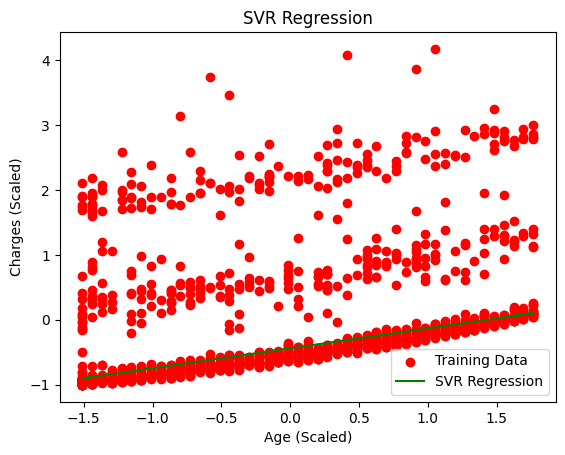

In [297]:
# Visualisation the regression result
import matplotlib.pyplot as plt
plt.scatter(X_scaled, y_scaled, color='red', label='Training Data')
plt.plot(X_scaled, regressor.predict(X_scaled), color='green', label='SVR Regression')
plt.title('SVR Regression')
plt.xlabel('Age (Scaled)')
plt.ylabel('Charges (Scaled)')
plt.legend()
plt.show()

In [298]:
# Fitting Regression model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled.ravel())

SVR()

In [299]:
# predicts a new result with SVR polynomial regression
new_age = np.array([[40]])
new_age_scaled = scaler_X.transform(new_age)
predicted_charge_scaled = regressor.predict(new_age_scaled)
predicted_charge = scaler_y.inverse_transform([predicted_charge_scaled])
print("Predicted insurance charge for age 40:", predicted_charge)

Predicted insurance charge for age 40: [[7708.89159431]]


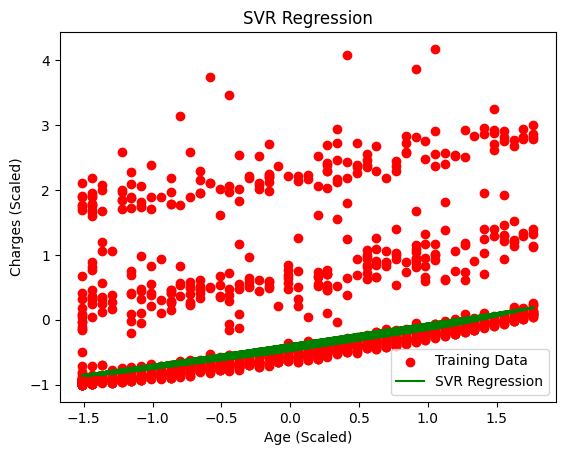

In [300]:
# Visualisation the regression result
import matplotlib.pyplot as plt
plt.scatter(X_scaled, y_scaled, color='red', label='Training Data')
plt.plot(X_scaled, regressor.predict(X_scaled), color='green', label='SVR Regression')
plt.title('SVR Regression')
plt.xlabel('Age (Scaled)')
plt.ylabel('Charges (Scaled)')
plt.legend()
plt.show()